# Project: Analysis of No Show Appointments

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Description
In this project, we will be investigating 100k+ medical appointment data from Brazil

In particular, we will be interested in finding variables that lead to missed appointments.

**COLUMNS**
<ul>
<li>PateintId: Patients Identification Number</li>
<li>AppointmentId: Appointment Identification Number</li>
<li>Gender: Gender of Patient</li>
<li>ScheduledDay: Day Appointment was scheduled</li>
<li>Appoinmtent Day: Day of Appointment</li>
<li>Age: Age of Patient</li>
<li>Neighbourhood: Neighbourhood of Patient</li>
<li>Scholarship: Patient on Social Welfare</li>
<li>Hypertension</li> 
<li>Diabetes</li>
<li>Alcoholism</li>
<li>Handcap</li>
<li>SMS_received</li>
<li>No-show</li>
</ul>

### Question for Analysis
##### What are the variables that might affect a no show patient?
> For this we look at the most obvious variables Gender, Age and Scholarship (Social Welfare)

In [1]:
#import packages here
from datetime import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## DATA WRANGLING
>The dataset we will be analysing is uploaded and examined to check for "cleanlinness" 

In [2]:
# custom_date =lambda x: datetime.strftime(x, "%Y-%m-%d")
#read and load dataframe
df = pd.read_csv('noshow.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

> The dataset contains 110,527 rows and 14 columns

### Data Cleaning

Check the datatypes of each column. We can see that "scheduledday" and "appointmentday" need to be changed to date dtype.

In [4]:
#check datatypes of columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for non unique values in the dataset.

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see that 62k+ patients made over 110k appointments

Make all column names lowercase and change '-' to '_' for uniformity.

In [6]:
#make all column names lowercase and replace '-' with '_'
df.rename(columns = lambda x:x.strip().lower().replace('-', '_'), inplace=True)

Correct Misspelled column(s)

In [7]:
# df.rename(columns={'hipertension':'hypertension'}, inplace=True)
def correct_name(a,b):
    df.rename(columns={a:b}, inplace=True)
    c = df.rename(columns={a:b}, inplace=True)
    print(c)

In [8]:
correct_name('hipertension', 'hypertension')
correct_name('handcap', 'handicap')
correct_name('appointmentday', 'appt_day')
df.head()

None
None
None


,patientid,appointmentid,gender,scheduledday,appt_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Drop unused columns

In [9]:
df.drop(['appointmentid'], axis=1, inplace= True)

Check the info of dataframe to guide Exploratory Data Analysis

> Investigate 
<ul>
    <li>Scholarship</li>
    <li>Age</li>
    <li>Gender</li>
    
</ul>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   patientid      110527 non-null  float64
 1   gender         110527 non-null  object 
 2   scheduledday   110527 non-null  object 
 3   appt_day       110527 non-null  object 
 4   age            110527 non-null  int64  
 5   neighbourhood  110527 non-null  object 
 6   scholarship    110527 non-null  int64  
 7   hypertension   110527 non-null  int64  
 8   diabetes       110527 non-null  int64  
 9   alcoholism     110527 non-null  int64  
 10  handicap       110527 non-null  int64  
 11  sms_received   110527 non-null  int64  
 12  no_show        110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


In [11]:
#maps the show columns variables from Yes and No to False and True respectively
df['show']= df['no_show'].map({'Yes': False, 'No': True})


<a id='eda'></a>
## Exploratory Data Analysis

#### First let's find out the percentage of patients who kept their appointments
> First we will sum the show and no show appointments in 2 separate variables. Then use a pie chart to display it.

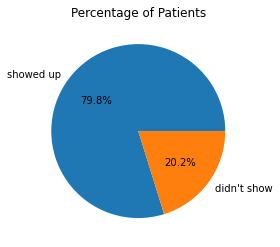

<Figure size 1080x1080 with 0 Axes>

88208


In [12]:
# sum appointments of show and no show patients
showed = (df['show'] == True).sum()
showed_not = (df['show'] == False).sum()
label = ("showed up", "didn't show")
value = [showed, showed_not]

#pie chart to display patient percentage
plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of Patients')
plt.figure(figsize=(15,15))
plt.show();
print(showed)

20% of patients don't show for their scheduled appointments

Create a function that groups patient_id and a given variable

In [13]:
#function to group columns by patient id and return a selected chart
def make_plot(x,y):
    df.groupby([x])['patientid'].count().plot(kind = y)
    plt.title(("patients per " + x))
    plt.xlabel(x)
    plt.ylabel('no. of patients')
    z = df.groupby([x])['patientid'].count()
    print(z)

scholarship
0    99666
1    10861
Name: patientid, dtype: int64


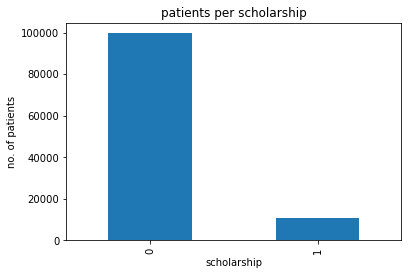

In [14]:
make_plot('scholarship', 'bar')

age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: patientid, Length: 104, dtype: int64


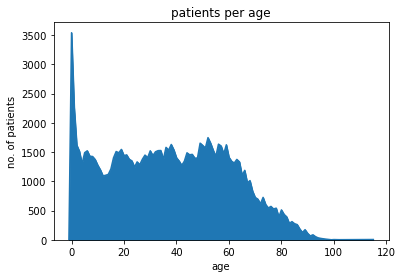

In [15]:
make_plot('age', 'area')

gender
F    71840
M    38687
Name: patientid, dtype: int64


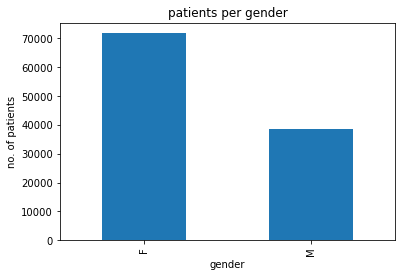

In [16]:
make_plot('gender', 'bar')

There are more female patients than male

#### Create new column called "age_group"

In [17]:
# View the min, 25%, 50%, 75%, max age values with Pandas describe
df.describe().age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [18]:
# Labels for the four  age groups
bin_names = ['child', 'teen', 'adult', 'old'] # Name each age group

In [19]:
# Bin edges  to "cut" the data into groups
#bin_edges = [-1.0, 18.0, 37.0, 55.0, 115.0] # Fill in this list with five values you just found

In [20]:
#create a new column called age_group
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head(1)

NameError: name 'bin_edges' is not defined

In [ ]:
scholar = (df['scholarship'] == True).sum()
not_scholar = (df['scholarship'] == False).sum()

value = [scholar, not_scholar]
label = ('scholar','not a scholar')

plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('percentage of patients on scholarship')
plt.figure(figsize=(10,10))
plt.show()

From the pie chart we can see that 90% of patients are not on Social Welfare

## Is gender associated with keeping appointments?

In [ ]:
df.groupby('gender').no_show.value_counts().plot(kind='bar');

We can see more women than men kept their appointments

Looking at the average, we can see gender is not a factor in appointments being kept. 

## Is a age a factor for keeping appointments?

In [ ]:
df.age_group.value_counts().plot(kind='pie');

Age wise, there's an almost even distribution of age groups.

In [ ]:
df.groupby('age_group')['show'].value_counts().plot(kind='bar');


On average, adult women and men kept their appointments more than other age groups, with teens and children having the highest abscence.

<a id='wrangling'></a>
### Conclusions

From our analysis of this dataset, we can see that gender doesn't play a huge factor in missed/kept appoinments, AGE does.
We can see younger people missed their appointments more, this might be due to the fact they have to be brought in by an older person.